In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy.linalg import inv
from scipy.interpolate import interp1d

In [70]:
path = '/home/rus/Desktop/Perception/Project_Sensors_Fusion/2D_trajectory/4th/4th_trajectory/'
mocap = pd.read_csv(path+'_slash_vicon_slash_obstacle1_slash_obstacle1.csv')
hedge = pd.read_csv(path+'_slash_hedge_pos.csv')
imu = pd.read_csv(path+'_slash_imu_slash_data.csv')

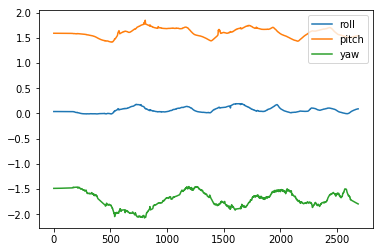

In [71]:
imu_angles = pd.read_csv(path + '_slash_imu_slash_rpy.csv')
plt.plot(imu_angles.x)
plt.plot(imu_angles.y)
plt.plot(imu_angles.z)
plt.legend(['roll', 'pitch', 'yaw'])

## Mocap head

In [3]:
mocap.head()

,rosbagTimestamp,header,seq,stamp,secs,nsecs,frame_id,child_frame_id,transform,translation,x,y,z,rotation,x.1,y.1,z.1,w
0,1545136351463289878,NaN,765273,NaN,1545136350,446487493,"""/world""","""vicon/obstacle1/obstacle1""",NaN,NaN,-0.435918,0.970477,0.775482,NaN,-0.009709,-0.004875,-0.739238,0.673357
1,1545136351463317604,NaN,765274,NaN,1545136350,456386140,"""/world""","""vicon/obstacle1/obstacle1""",NaN,NaN,-0.435915,0.970489,0.775458,NaN,-0.009799,-0.004946,-0.739212,0.673383
2,1545136351463369604,NaN,765275,NaN,1545136350,466519081,"""/world""","""vicon/obstacle1/obstacle1""",NaN,NaN,-0.435925,0.970507,0.775418,NaN,-0.010239,-0.004881,-0.739256,0.673328
3,1545136351463398031,NaN,765276,NaN,1545136350,476292992,"""/world""","""vicon/obstacle1/obstacle1""",NaN,NaN,-0.435918,0.970536,0.775376,NaN,-0.010577,-0.005014,-0.739401,0.673164
4,1545136351463428539,NaN,765277,NaN,1545136350,486330401,"""/world""","""vicon/obstacle1/obstacle1""",NaN,NaN,-0.435938,0.970542,0.775381,NaN,-0.010294,-0.004945,-0.739322,0.673255


## Hedge head

In [1048]:
hedge.head()

,rosbagTimestamp,timestamp_ms,x_m,y_m,z_m,flags
0,1545136351465738461,135067,0.143,-0.127,-0.110,2
1,1545136351466092978,135184,0.143,-0.129,-0.109,2
2,1545136351482572377,135300,0.143,-0.130,-0.109,2
3,1545136351601100427,135415,0.143,-0.131,-0.109,2
4,1545136351718601512,135531,0.143,-0.131,-0.108,2


## Imu head

In [1049]:
imu.head()

,rosbagTimestamp,header,seq,stamp,secs,nsecs,frame_id,orientation,x,y,...,angular_velocity,x.1,y.1,z.1,angular_velocity_covariance,linear_acceleration,x.2,y.2,z.2,linear_acceleration_covariance
0,1545136351462087947,NaN,1189,NaN,1545136349,746926357,"""imu_link""",NaN,0.073584,0.109839,...,NaN,0.026632,0.033023,0.008522,"[2.5e-05, 0.0, 0.0, 0.0, 2.5e-05, 0.0, 0.0, 0....",NaN,-0.167064,-0.079041,9.898109,"[0.0036, 0.0, 0.0, 0.0, 0.0036, 0.0, 0.0, 0.0,..."
1,1545136351462190820,NaN,1190,NaN,1545136349,798433565,"""imu_link""",NaN,0.073584,0.109637,...,NaN,0.025566,0.034088,0.007457,"[2.5e-05, 0.0, 0.0, 0.0, 2.5e-05, 0.0, 0.0, 0....",NaN,-0.215567,-0.147304,9.880145,"[0.0036, 0.0, 0.0, 0.0, 0.0036, 0.0, 0.0, 0.0,..."
2,1545136351462291783,NaN,1191,NaN,1545136349,848614924,"""imu_link""",NaN,0.073718,0.109872,...,NaN,0.025566,0.034088,0.007457,"[2.5e-05, 0.0, 0.0, 0.0, 2.5e-05, 0.0, 0.0, 0....",NaN,-0.215567,-0.118562,9.957390,"[0.0036, 0.0, 0.0, 0.0, 0.0036, 0.0, 0.0, 0.0,..."
3,1545136351462485781,NaN,1192,NaN,1545136349,897813959,"""imu_link""",NaN,0.073852,0.110074,...,NaN,0.025566,0.034088,0.007457,"[2.5e-05, 0.0, 0.0, 0.0, 2.5e-05, 0.0, 0.0, 0....",NaN,-0.235327,-0.028742,10.056191,"[0.0036, 0.0, 0.0, 0.0, 0.0036, 0.0, 0.0, 0.0,..."
4,1545136351462747193,NaN,1193,NaN,1545136349,947824969,"""imu_link""",NaN,0.073752,0.109872,...,NaN,0.025566,0.034088,0.013848,"[2.5e-05, 0.0, 0.0, 0.0, 2.5e-05, 0.0, 0.0, 0....",NaN,-0.382631,-0.059281,9.996910,"[0.0036, 0.0, 0.0, 0.0, 0.0036, 0.0, 0.0, 0.0,..."


In [4]:
list(imu.columns.values)

['rosbagTimestamp',
 'header',
 'seq',
 'stamp',
 'secs',
 'nsecs',
 'frame_id',
 'orientation',
 'x',
 'y',
 'z',
 'w',
 'orientation_covariance',
 'angular_velocity',
 'x.1',
 'y.1',
 'z.1',
 'angular_velocity_covariance',
 'linear_acceleration',
 'x.2',
 'y.2',
 'z.2',
 'linear_acceleration_covariance']

#### Data
```m*``` - mocap data  
```h*``` - US (hedge) data  
```i*``` - imu data  

In [72]:
### mocap data
mts = np.array(mocap.secs)
mts = mts + np.array(mocap.nsecs/10e8)
mts = mts - mts[0]

mx = np.array(mocap.x)
mx = mx - mx[0]
my = np.array(mocap.y)
my = my - my[0]
mz = np.array(mocap.z)
mz = mz - mz[0]
### hedge data
hts = np.array(hedge.timestamp_ms/1000)
hts = hts - hts[0]
hts = hts * mts[-1]/hts[-1]
hy = np.array(-hedge.x_m)
hx = np.array(hedge.y_m)
# matching of mocap and haedge starts of trajectory
#dx = hx[0] - mx[0]
#dy = hy[0] - my[0]
hx = hx - hx[0]
hy = hy - hy[0]

### imu data
iax = np.array(imu['x.2'])
iay = np.array(imu['y.2'])
#temp = -iax
#iax = iay
#iay = temp

iaz = np.array(imu['z.2'])

#iox = np.array(imu['x.1'])
#ioy = np.array(imu['y.1'])
#ioz = np.array(imu['z.1'])

its = np.array(imu.secs)
its = its + np.array(imu.nsecs/10e8)
its = its - its[0]
its = its * 0.9999999 * mts[-1]/its[-1]

In [73]:
mts[0], hts[0], its[0], mts[-1], hts[-1], its[-1]

(0.0, 0.0, 0.0, 131.50883769989014, 131.50883769989014, 131.5088245490064)

In [74]:
# compute shift for imu acc
idax = np.mean(iax)
iday = np.mean(iay)
idaz = np.mean(iaz)

In [75]:
# compute mean dt for all sensors
mdts = mts[1:] - mts[:-1]
mdt = mdts.mean()

hdts = hts[1:] - hts[:-1]
hdt = hdts.mean()

idts = its[1:] - its[:-1]
idt = idts.mean()

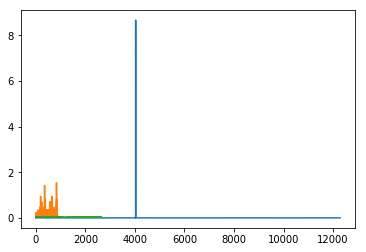

In [76]:
plt.plot(mdts)
plt.plot(hdts)
plt.plot(idts)

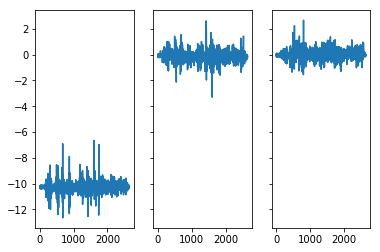

In [77]:
fig, axes = plt.subplots(1,3, sharey=True)
axes[0].plot(iax)
axes[1].plot(iay)
axes[2].plot(iaz)

(-0.1287500000000001,
 0.9877499999999999,
 -1.0342999999999998,
 0.13829999999999998)

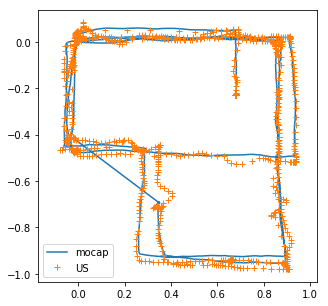

In [78]:
plt.figure(figsize=(5,5))
plt.plot(mx, my, label='mocap')
plt.plot(hx, hy, '+', label='US')
plt.legend()
plt.axis('equal')

In [258]:
def kalman3(x, P, a, z, dt, sh, sa):
    F = np.array([
        [1, 0, dt, 0],
        [0, 1, 0, dt],
        [0, 0, 1,  0],
        [0, 0, 0,  1],
    ])
    B = np.array([
        [(dt**2)/2, 0],
        [0, (dt**2)/2],
        [dt,        0],
        [0,        dt]
    ])
    H = np.array([
        [1, 0, 0,  0],
        [0, 1, 0,  0]
    ])
    R = sh**2 * np.eye(2)
    sav = sa * dt
    sap = (sa * dt ** 2)/2
    Q = np.array([
        [sap**2, 0, sap*sav,  0],
        [0, sap**2, 0,  sap*sav],
        [sap*sav, 0, sav**2,  0],
        [0, sap*sav, 0,  sav**2]
    ])
    if a[0] is not None:
#         print('B=', B)
#         print('a=', a)
#         print(np.dot(B, a), type(a[1]))
        x = np.dot(F, x) + np.dot(B, a)
        P = F @ P @ F.T + Q
    
    if z[0] is not None:
        y = z - np.dot(H, x)
        K = P @ H.T @ inv(H @ P @ H.T + R)
        #print(np.linalg.norm(K, ord=2))
        #print(K)
        x = x + np.dot(K, y)
        P = (np.eye(4) - K @ H) @ P
    
    #P = (np.eye(4) - K @ H) @ P @ (np.eye(4) - K @ H) + K @ R @ K.T
    return x, P

### Without measurements interpolation

In [272]:
its_list = list(its); hts_list = list(hts)
merged_time_list = np.sort(list(set(its_list + hts_list)))
# plt.plot(merged_time_list)

A = np.array([iax[0], iay[0]])[np.newaxis].T
Z = np.array([hx[0], hy[0]])[np.newaxis].T

for t in merged_time_list:
    ax = iax[np.where(its_list==t)[0][0]] if t in its_list else None
    ay = iay[np.where(its_list==t)[0][0]] if t in its_list else None
    az = iaz[np.where(its_list==t)[0][0]] if t in its_list else None
    
    A = np.hstack((A,np.array([[az],[ay]])))
    
    zx = hx[np.where(hts_list==t)[0][0]] if t in hts_list else None
    zy = hy[np.where(hts_list==t)[0][0]] if t in hts_list else None
        
    Z = np.hstack((Z,np.array([[zx],[zy]])))
    
A = A[:,1:]
Z = Z[:,1:]

In [275]:
xs = []
Ps = []

sh = 0.02
sa = 0.3
# sa =  34.22

x = [hx[0], hy[0], 0, 0]
P = np.eye(4)* 10e-3
i=0

for i in range(A.shape[1]):
    x, P = kalman3(x=x, P=P, a=A[:,i], z=Z[:,i], dt=idt, sh=sh, sa=sa)
    i += 1
    xs.append(x)
    Ps.append(P)
xs = np.array(xs)
Ps = np.array(Ps)

(-0.25319532598555106,
 1.2248821480037286,
 -1.0730586815103584,
 0.14014565150049324)

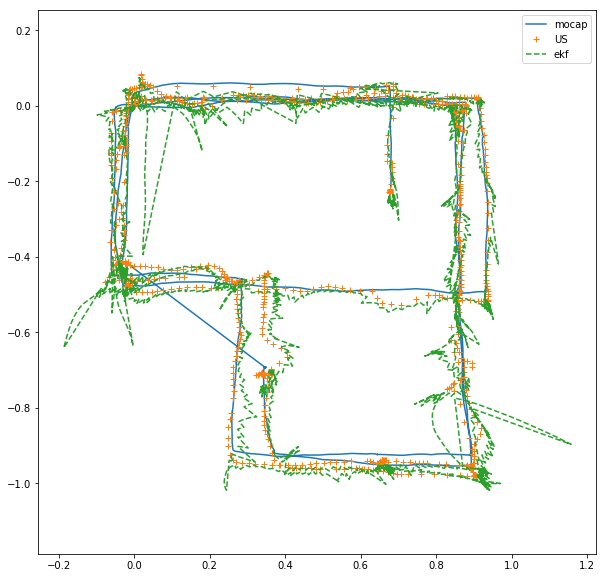

In [276]:
plt.figure(figsize=(10,10))
plt.plot(mx, my, label='mocap')
plt.plot(hx, hy, '+', label='US')
plt.plot(xs[:, 0], xs[:, 1], '--', label='ekf')
plt.legend()
plt.axis('equal')

### With measurements interpolation

In [254]:
xs = []
Ps = []

sh = 0.02
sa = 0.3
# sa =  34.22

#interpolation
f     = interp1d(hts, hx)
f2    = interp1d(hts, hy)
tnew  = its
hxnew = f(tnew)
hynew = f2(tnew)
zs = np.array([hxnew, hynew])

x = [hxnew[0], hynew[0], 0, 0]
P = np.eye(4)* 10e-3
i=0

for a in np.array([iaz, iay]).T[:-1]:
#for a in np.array([(iax-idax), (iay-iday)]).T[:-1]:
    z = zs.T[i]
    x, P = kalman3(x=x, P=P, a=a, z=z, dt=idt, sh=sh, sa=sa)
    i += 1
    xs.append(x)
    Ps.append(P)
xs = np.array(xs)
Ps = np.array(Ps)

(-0.14283146144779066,
 0.9980513237775726,
 -1.0494830640696904,
 0.13902300305093762)

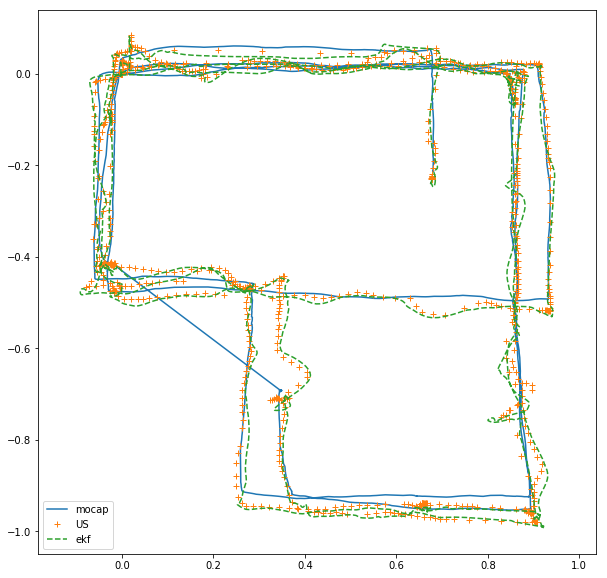

In [257]:
plt.figure(figsize=(10,10))
plt.plot(mx, my, label='mocap')
plt.plot(hx, hy, '+', label='US')
plt.plot(xs[:, 0], xs[:, 1], '--', label='ekf')
plt.legend()
plt.axis('equal')

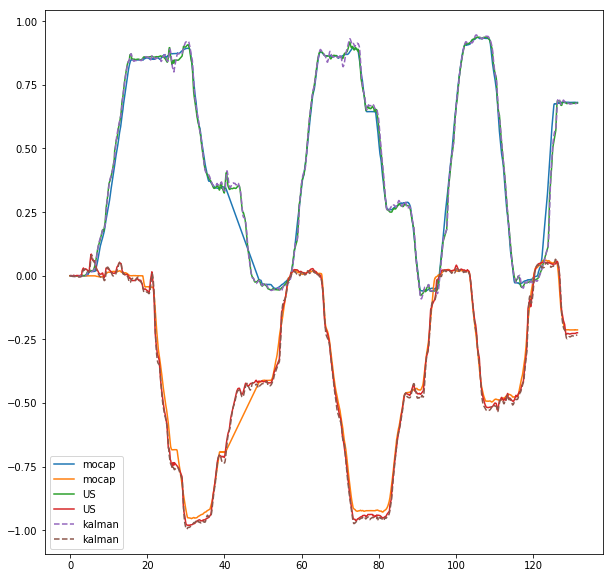

In [256]:
plt.figure(figsize=(10, 10))
plt.plot(mts, mx, label='mocap')
plt.plot(mts, my, label='mocap')
plt.plot(its, zs[0].T, label='US')#[:20])
plt.plot(its, zs[1].T, label='US')#[:20])
plt.plot(its[:-1], xs[:, :2], '--', label='kalman')#[:20])
plt.legend()

## Postprocessing

In [83]:
def sigma3plot(t_mu, t_real, mu, sigma, x_real, color=None):
    """
    Plots a shaded region on a graph between specified lower and upper confidence intervals (L and U).

    :param t: The time series corresponding to the state.
    :param mu: The predicted state of the variable.
    :param minus_sigma: THe lower bound of the confidence interval.
    :param plus_sigma: The upper bound of the confidence interval.
    :param x_real: The real value of the state variable.
    :param color: Color of the fill inside the lower and upper bound curves (optional).
    :return handle: The handle to the plot of the state variable.
    """
    minus_sigma = x_real - sigma
    plus_sigma  = x_real + sigma
    assert minus_sigma.shape[0] == plus_sigma.shape[0]
    assert t_mu.shape[0] == mu.shape[0]
    
    plt.figure(figsize=(10,10))
    plt.fill_between(t_real, minus_sigma, plus_sigma, color=color, alpha=0.5)
    x_pred, = plt.plot(t_mu, mu, label='filtered')
    x_real, = plt.plot(t_real, x_real, label='groundtruth')
    plt.legend()
    plt.show()

    return x_pred, x_real

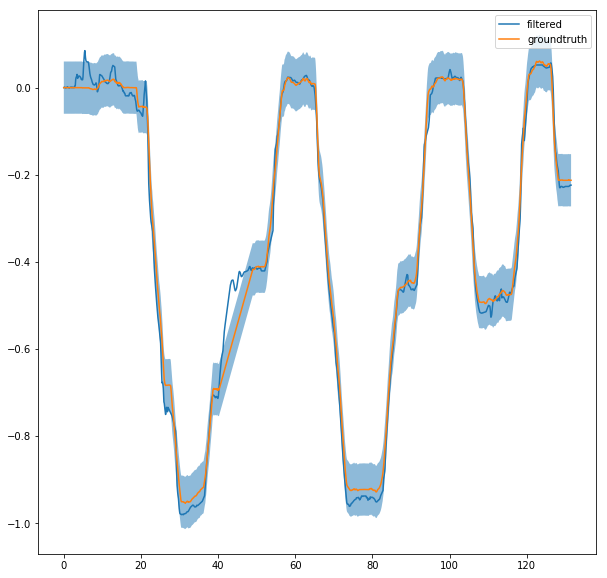

(<matplotlib.lines.Line2D at 0x7f2337a88b00>,
 <matplotlib.lines.Line2D at 0x7f2337a88c50>)

In [84]:
sigma3plot(t_mu=its, t_real=mts, mu=zs[1].T, sigma=3*sh, x_real=my, color=None)

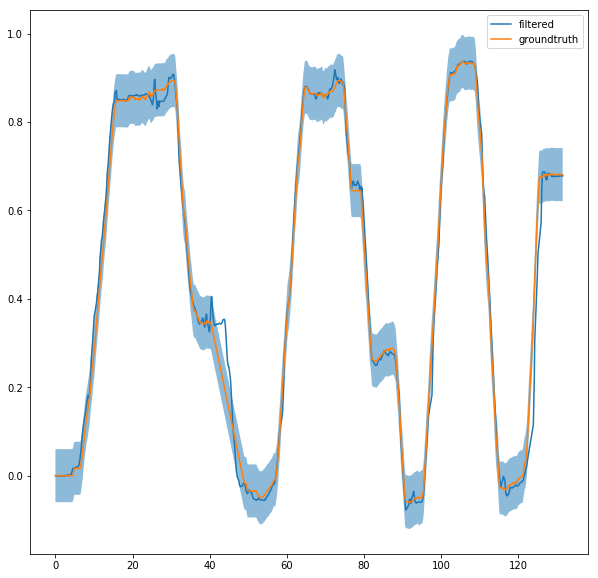

(<matplotlib.lines.Line2D at 0x7f2337a49f60>,
 <matplotlib.lines.Line2D at 0x7f2337a500f0>)

In [85]:
sigma3plot(t_mu=its, t_real=mts, mu=zs[0].T, sigma=3*sh, x_real=mx, color=None)

# STOP HERE

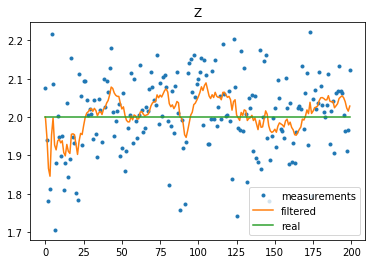

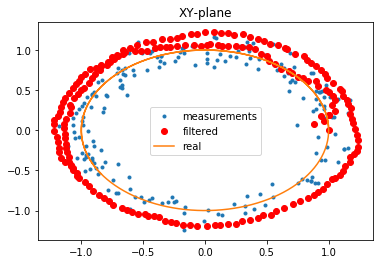

In [1172]:
import numpy as np
from math import *

import matplotlib.pyplot as plt


def transition_matrix(T):
	"""
	input: T - timestep
	output: G - 6x6 transition matrix, propagating position and velocity
			accoring to the motion model:
			x_i = x_i-1 + v_i*T + a_i*T^2 / 2
			v_i = v_i-1 + a_i* T
			for each of 3 coordinates x = [x, y, z], v = [vx, vy, vz],
			where a_i is random acceleration
	"""
	G = np.eye(6);
	G[0,1] = T;
	G[2,3] = T;
	G[4,5] = T;
	return G # 6x6

def odometry_covariance_matrix(T, sigmaA):
	"""
	input: T - timestep, sigmaA - acceleration a_i std deviation
	F describes random acceleration terms in motion model
	"""
	F = np.array([[T**2/2, 0, 0],
                  [T, 0, 0], 
                  [0, T**2/2, 0], 
                  [0, T, 0], 
                  [0, 0, T**2/2], 
                  [0, 0, T]])
	R = F @ F.T * (sigmaA**2)
	return R # 6x6 - odometry noise matrix

def observation_matrix(T):
	"""
	input: T - timestep
	output: H - 3x6 measurement matrix, choosing zx, zy, zz from Xpr
	"""
	H = np.zeros((3,6))
	H[0,0] = 1
	H[1,2] = 1
	H[2,4] = 1
	return H # 3x6


def kalman_filter(X0, P0, z, T):
	"""
	input: X0 - initial state
		   z - measurements vector (noisy trajectory)
		   T - timestep
	output: Xfl - filtered trajectory
			Pfl - array of covariences on each timestep
	"""
	N = z.shape[1]
	Xpr = np.zeros((6,N))
	Xpr[:,0] = X0
	Xfl = np.zeros((6,N))
	Xfl[:,0] = X0

	Ppr = [P0]
	Pfl = [P0]

	K = [np.zeros((6,3))]

	G = transition_matrix(T)
	R = odometry_covariance_matrix(T, sigmaA=0.4)
	H = observation_matrix(T)
	sigmaN = 0.1
	Q = np.diag(sigmaN**2 * np.ones(3))
	# print('Q=\n', Q)

	for i in range(1,N):
	    # prediction
	    Xpr[:,i] = G @ Xfl[:,i-1]
	    Ppr.append(G @ Pfl[i-1] @ (G.T) + R)

	    # correction
	    K.append( Ppr[i] @ H.T @ np.linalg.inv(H @ Ppr[i] @ H.T + Q) )
	    Xfl[:,i] = Xpr[:,i] + K[i] @ (z[:,i] - H @ Xpr[:,i])
	    Pfl.append( (np.eye(6) - K[i] @ H) @ Ppr[i] )

	    # Xfl = Xpr; Pfl = Ppr

	return np.array(Xfl), np.array(Pfl)


visualize = 1

T = 0.05
G = transition_matrix(T)
R = odometry_covariance_matrix(T, sigmaA=4)
H = observation_matrix(T)

# print('G = \n', G)
# print('R = \n', R)
# print('H = \n', H)

N = 200
t = T * np.linspace(1, N, N)
x = np.cos(t); y = np.sin(t); z = 2*np.ones(N)
sigma_noise = 0.1
zx = x + sigma_noise*np.random.randn(N)
zy = y + sigma_noise*np.random.randn(N)
zz = z + sigma_noise*np.random.randn(N)

Z = np.vstack((zx,zy,zz))
X0 = np.array([1,0, 0,0, 2,0]) # x,vx, y,vy, z,nz
P0 = 0.1 * np.eye(6)
Xfl, Pfl = kalman_filter(X0, P0, Z, T)

xfl = Xfl[0,:]
yfl = Xfl[2,:]
zfl = Xfl[4,:]


if visualize:
    # plt.figure()
    # plt.plot(Pfl[:,0,0])
    # plt.title('Sigma_X')

    # plt.figure()
    # plt.plot(Pfl[:,2,2])
    # plt.title('Sigma_Y')

    # plt.figure()
    # plt.plot(Pfl[:,4,4])
    # plt.title('Sigma_Z')

    # plt.figure()
    # plt.plot(zx, '.')
    # plt.plot(xfl)
    # plt.plot(x)
    # plt.title('X')
    # plt.legend(['measurements', 'filtered', 'real'])

    # plt.figure()
    # plt.plot(zy, '.')
    # plt.plot(yfl)
    # plt.plot(y)
    # plt.title('Y')
    # plt.legend(['measurements', 'filtered', 'real'])

    plt.figure()
    plt.plot(zz, '.')
    plt.plot(zfl)
    plt.plot(z)
    plt.title('Z')
    plt.legend(['measurements', 'filtered', 'real'])

    plt.figure()
    plt.plot(zx, zy, '.')
    plt.plot(xfl, yfl, 'ro')
    plt.plot(x, y)
    plt.title('XY-plane')
    plt.legend(['measurements', 'filtered', 'real'])

    plt.show()

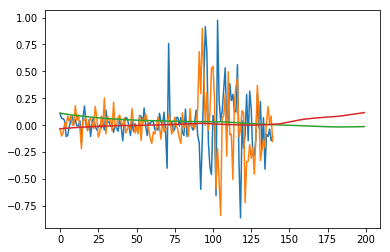

In [1161]:
b, a = signal.butter(1, 0.007)
y = signal.filtfilt(b, a, [iax-idax,iay-iday], padlen=150)
plt.plot((iax-idax)[:140])
plt.plot((iay-iday)[:140])
plt.plot(y[0][:200])#, y[1][:200])
plt.plot(y[1][:200])

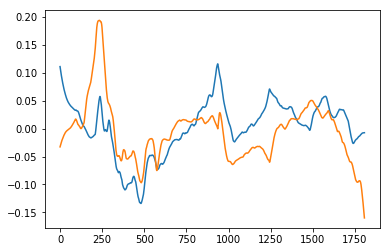

In [1162]:
plt.plot(y[0])#[:200])#, y[1][:200])
plt.plot(y[1])#[:200])

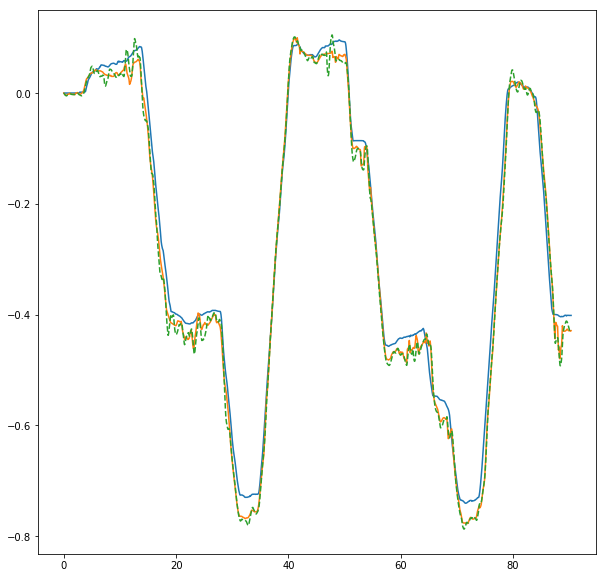

In [1256]:
b, a = signal.butter(4, 0.0045, btype='high')
y = signal.filtfilt(b, a, xs[:, :2].T, padlen=150)

plt.figure(figsize=(10, 10))
plt.plot(mts, mx)
#plt.plot(mts, my)
plt.plot(its, zs[0].T, label='US')#[:20])
#plt.plot(its, zs[1].T, label='US')#[:20])
plt.plot(its[:-1], xs[:, :1], '--', label='kalman')#[:20])
#plt.plot(its[:-1], -y[0])
#plt.plot(its[:-1], y[1])

#plt.plot(its[:-1], xs[:, 0] + (Ps[:, 0, 0])**0.5)
#plt.plot(its[:-1], xs[:, 0] - (Ps[:, 0, 0])**0.5)
#plt.xlim(0,5)
#plt.ylim(-0.01,0.01)
#plt.plot(hts, hx, 'x')